# <div align='center'>Introduction to Python for data analysis: NumPy and pandas libraries</div>


# Contents

1. <a href="#numpy">NumPy</a>
3. <a href="#pandas">Pandas</a>
    1. <a href='#series'>Series</a>
    2. <a href='#dataframes'>DataFrames</a>
        1. <a href='#csv'>Create a DataFrame from a CSV file</a>
        2. <a href='#dict'>Create a DataFrame from a dictionary</a>
        3. <a href='#array'>Create a DataFrame from a NumPy array</a>
        4. <a href="#summarize">Summarize data</a>
        5. <a href="#combine">Combining and merging DataFrames</a>
        6. <a href='#write'>Save DataFrames to a file and convert to NumPy array</a>
        7. <a href="#clean">Handling missing data</a>
        8. <a href="#transform">Transform and replace data</a>
        9. <a href="#remove">Remove unwanted rows/columns</a>
        10. <a href="#query">Examine the data and make selections and queries</a>
        11. <a href="#add">Add new columns/rows</a>
        12. <a href="#plotting">Plotting</a>
        13. <a href="#other">Other helpful attributes and functions</a>

NumPy and pandas are two fundamental libraries for data analysis. They are used to efficiently manipulate and prepare data for data analysis and visualization. These tools are used to clean the data and make operations.

## <div id="numpy">1. NumPy</div>

[NumPy](https://numpy.org/) is a powerful library that offers comprehensive mathematical functions, random number generators, linear algebra routines and much more. Its main data object is an array, known as ```ndarray```, which is significantly faster than the Python built-in list data type.

In [1]:
import numpy as np

If the above didn't work, please run the following on a terminal/console:
```
pip install numpy
```

**WIP: more will come soon!**

## <div id="pandas">2. Pandas</div>

[Pandas](https://pandas.pydata.org/) is a library that enables the manipulation of data in a fast, powerful and easy way. Pandas has two main types of Data Structures*:

- ```Series```: 1D labeled array where elements must be of the same data type. Once created, its size cannot be changed.
- ```DataFrame```: 2D labeled table where elements can have different data type, and can be removed/added.

*Data Structures allow you to organize, process and store data.

To install pandas, see [getting_started](https://pandas.pydata.org/getting_started.html) (needs NumPy, among other libraries).

You can start using pandas in your codes, by simply adding:

In [2]:
import pandas as pd

If the above didn't work, please run the following on a terminal/console:
```
pip install pandas
```

### <div id="series">2.A Series</div>

Series is a one-dimensional labeled array whose object size cannot be changed.

Let's create a Series from an array of integer values which we will label:

In [3]:
my_series = pd.Series(data=[22, 1, 0], index=["age", "ndogs",  "ncats"])

The ```index``` parameter accepts a ```list``` that allows you to label the data.

The ```data``` argument can take any of the following data types:

- ```dict```
- ```list```
- ```ndarray```

Values inside the dictionary and elements in the array can be of ```int```, ```float``` or ```bool``` type.

There is also a ```name``` parameter that allows you to name your Series.

If ```data``` is of ```dict``` type and ```index``` is not provided, the dictionary keys will be used as index labels.

Please see [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) for more information.

### <div id="dataframes">2.B DataFrames</div>

With Pandas we can take data (from a CSV/TSV file, a SQL database, a dictionary, a NumPy array, etc) and create a Python object with rows and columns called ```DataFrame``` that resembles a table (like one would find in Microsoft Excel, for example).

There are many functions for opening different file formats. We will see only how to create a DataFrame out of a CSV file, you can find all other functions [here](https://pandas.pydata.org/docs/reference/io.html).

#### <div id="csv">2.B.a Create a DataFrame from a CSV file</div>

There are many functions for opening different file formats. We will see only how to create a DataFrame out of a CSV file, you can find all other functions [here](https://pandas.pydata.org/docs/reference/io.html).

Let's create a DataFrame out of the ```cost_of_living.csv``` file (from [www.worldata.info](https://www.worlddata.info/cost-of-living.php)) which has a list of countries, each with its ```cost_index```, ```monthly_income``` and ```purchasing_power_index```.

In [4]:
df = pd.read_csv('cost_of_living.csv')
df.head(4)

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1


The first line, ```df = pd.read_csv('cost_of_living.csv')``` created the DataFrame, while the second one ```df.head(4)``` printed the first 4 rows. If one would like to print the last ```n``` rows, one would need to use ```df.tail(n)``` instead.

**Note:** each entry/row in our DataFrame has an index value. Indexing in DataFrames start at zero. For example, in our DataFrame above, the row corresponding to Switzerland corresponds to the index 1.

Let's say we wanted only the ```country``` and ```monthly_income``` columns. In that case, we can use the ```usecols``` keyword to pass the list of columns we are interested in:

In [39]:
df_income = pd.read_csv('cost_of_living.csv', usecols = ['country', 'monthly_income'])
df_income.head(4)

,country,monthly_income
0,Bermuda,9712
1,Switzerland,7530
2,Cayman Islands,5281
3,Israel,4130


**Note #1:** if the CSV file doesn't have column names, one can define them with the ```names``` keyword when using the  ```read_csv()``` function.

For more options, see [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

**Note #2:** If you already created a DataFrame and want to select a subset of columns, you can do something like the following:

```
new_df = df[[col1, col2]]
```

```new_df``` will have only ```col1``` and ```col2``` from the ```df``` DataFrame.

For example, let's get only the ```country``` column from ```df_income```:

In [6]:
countries_df = df_income[['country']]
countries_df.head(5)

,country
0,Bermuda
1,Switzerland
2,Cayman Islands
3,Israel
4,Iceland


Please note that when selecting a single column, one can get a ```DataFrame``` using ```df[['colname']]``` or a ```Series``` using ```df['colname']```. For the example above, let's get now a Series from the ```country``` column:

In [7]:
countries_series = df_income['country']

We can now confirm their types:

In [8]:
print(f'{type(countries_series) = }')
print(f'{type(countries_df) = }')

type(countries_series) = <class 'pandas.core.series.Series'>
type(countries_df) = <class 'pandas.core.frame.DataFrame'>


#### <div id="dict">2.B.b Create a DataFrame from a dictionary</div>

One can also create a DataFrame out of a dictionary. In order to convert a certain Python object (dictionary, NumPy array, etc) to a DataFrame, we need to use ```pd.DataFrame()```. For all the options, please see [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [9]:
my_dict = {
    'column1': [1, 2, 3, 4],
    'column2': [3, 4, 2, 1],
    'column3': [3, 5, 1, 6],
}
df = pd.DataFrame(my_dict)
df.head()

,column1,column2,column3
0,1,3,3
1,2,4,5
2,3,2,1
3,4,1,6


Alternatively, one could create a DataFrame from a dictionary of Series:

In [10]:
my_series_dict = {
    'column1': pd.Series([1, 2, 3, 4]),
    'column2': pd.Series([3, 4, 2, 1]),
    'column3': pd.Series([3, 5, 1, 6]),
}
df = pd.DataFrame(my_dict)
df.head()

,column1,column2,column3
0,1,3,3
1,2,4,5
2,3,2,1
3,4,1,6


One could also create a DataFrame using a list of dictionaries:

In [11]:
data = [
    {'column1': 1, 'column2': 3, 'column3': 3},
    {'column1': 2, 'column2': 4, 'column3': 5},
    {'column1': 3, 'column2': 2, 'column3': 1},
    {'column1': 4, 'column2': 1, 'column3': 6},
]
df = pd.DataFrame(data)
df.head()

,column1,column2,column3
0,1,3,3
1,2,4,5
2,3,2,1
3,4,1,6


#### <div id="array">2.B.c Create a DataFrame from a NumPy array</div>

In [12]:
array = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10]])
df = pd.DataFrame(array, columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,1,2,3,4
1,4,5,6,7
2,7,8,9,10


Note: The ```columns``` keyword was used to label each column.

#### <div id="summarize">2.B.d Summarize data</div>

Let's read again the ```cost_of_living.csv``` file into a DataFrame and get some statistics/summaries:

In [13]:
df = pd.read_csv('cost_of_living.csv')
df.head()

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5


**<u>Number of rows and columns</u>:**

Use ```df.shape``` to get the number of rows (107) and columns (4):

In [14]:
df.shape

(107, 4)

If we only wish to know the number of rows, we can use ```len(df)```:

In [15]:
len(df)

107

**<u>List of column names</u>:**

Use ```df.columns``` to get the list of column names:

In [16]:
df.columns

Index(['country', 'cost_index', 'monthly_income', 'purchasing_power_index'], dtype='object')

**<u>Statistics for numerical columns</u>**

Another very useful command is ```df.describe()``` which provides summary statistics for numerical columns:

In [17]:
df.describe()

,cost_index,monthly_income,purchasing_power_index
count,107.000000,107.000000,107.000000
mean,62.555140,1826.532710,38.150467
std,33.747716,2100.275033,30.588024
min,22.800000,87.000000,3.400000
25%,36.400000,295.000000,14.050000
50%,48.900000,782.000000,25.800000
75%,84.550000,3130.000000,59.100000
max,157.600000,9712.000000,121.100000


There are many other methods that can be used to get statistics from a DataFrame (a Series or a column). Here is some of them:

- ```df.sum()```: returns the sum of each column
- ```df.mean()```: returns the mean of each column
- ```df.median()```: returns the mediam of each column
- ```df.std()```: returns the standard deviation of each column
- ```df.corr()```: returns the correlation between columns in a data frame
- ```df.count()```: returns the number of non-null values in each column
- ```df.min()```: returns the lowest value in each column
- ```df.max()```: returns the highest value in each column

You can find other functions in [api-dataframe-stats](https://pandas.pydata.org/pandas-docs/version/0.20.2/api.html#api-dataframe-stats).

**<u>Value counts</u>:**

The ```value_counts()``` function can be used to count the number of occurrences. For example, let's open the ```users.csv``` file which for a few different 'users', their age and country were recorded. Let's use the ```value_counts()``` function to count the number of times each age appears:

In [18]:
users = pd.read_csv('users.csv')
users['age'].value_counts()

19    3
32    3
20    2
27    2
31    2
28    1
21    1
22    1
26    1
34    1
29    1
24    1
23    1
25    1
Name: age, dtype: int64

As you can see, the most common ages are 19 and 32, both appearing 3 times.

#### <div id="combine">2.B.e Combining and merging DataFrames</div>

**<u>Concatenating DataFrames</u>:**

The ```concat()``` function can be used to concatenate DataFrames. Use the following syntax to add rows from DataFrames ```df1``` and ```df2``` to a new DataFrame (the same columns should be available in both DataFrames):

```
pd.concat([df1, df2], ignore_index=True)
```

```ignore_index=True``` will reset the indexing to force unique indexes.

Example:

In [19]:
dict_1 = {'A': [1, 2], 'B': [1, 3]}
dict_2 = {'A': [5, 8], 'B': [2, 9]}
df1 = pd.DataFrame(dict_1)
df2 = pd.DataFrame(dict_2)
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,A,B
0,1,1
1,2,3
2,5,2
3,8,9


Use the following syntax to add columns from DataFrames to a new DataFrame (input DataFrames should have the same number of rows and indexing):

```
pd.concat([df1, df2], axis=1)
```

Example:

In [20]:
dict_1 = {'A': [1, 2], 'B': [1, 3]}
dict_2 = {'C': [5, 8], 'D': [2, 9]}
df1 = pd.DataFrame(dict_1)
df2 = pd.DataFrame(dict_2)
df = pd.concat([df1, df2], axis=1)
df.head()

,A,B,C,D
0,1,1,5,2
1,2,3,8,9


**<u>Merging DataFrames:</u>**

Let's say we have two DataFrames with different (suplementary) information about the same countries. Let's mimic that by creating another DataFrame with the ```cost_index``` and ```purchasing_power_index``` columns from the ```cost_of_living.csv``` file and merge it with ```df_income``` that we created before (which contains only the ```country``` and ```monthly_income``` columns). Here we will use the ```pd.merge()``` method.

In [21]:
df_rest = pd.read_csv('cost_of_living.csv', usecols = ['country', 'cost_index', 'purchasing_power_index'])
df_rest.head(4)

,country,cost_index,purchasing_power_index
0,Bermuda,157.6,105.0
1,Switzerland,142.4,90.1
2,Cayman Islands,137.9,65.2
3,Israel,130.2,54.1


In [22]:
df_full = pd.merge(df_income, df_rest, how='left')
df_full.head(4)

,country,monthly_income,cost_index,purchasing_power_index
0,Bermuda,9712,157.6,105.0
1,Switzerland,7530,142.4,90.1
2,Cayman Islands,5281,137.9,65.2
3,Israel,4130,130.2,54.1


Note: ```how=left``` is used only to be able to compare with the ```join()``` function (see below). To learn about ```how``` and other attributes, see [pandas.DataFrame.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

As you can see, ```df_full``` has exactly the same information as the DataFrame that we created using all columns (with just a slightly different order for the columns). We can change the order of the columns in the following way:

In [23]:
df_full = df_full[['country', 'cost_index', 'monthly_income', 'purchasing_power_index']]
df_full.head(4)

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1



Alternatively, we can use the ```join()``` function to add columns from two DataFrames sharing a column. ```join()``` can be used to join columns with another DataFrame either on index or on a key column.

In [24]:
df = df_income.join(df_rest.set_index('country'), on='country')
df.head()

,country,monthly_income,cost_index,purchasing_power_index
0,Bermuda,9712,157.6,105.0
1,Switzerland,7530,142.4,90.1
2,Cayman Islands,5281,137.9,65.2
3,Israel,4130,130.2,54.1
4,Iceland,5368,128.0,71.5


As you can see, we obtained the same result as with the ```merge()``` function. For more details about the ```join()``` function, see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html).

**Note:** I have used 

#### <div id="write">2.B.f Save DataFrame to a file and convert to NumPy arrays</div>

DataFrames can be saved into different types of files (CSV, Excel, JSON, SQL table, etc). They are of the form ```df.to_filetype(filename)```. To find all of them, please see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

It is also possible to convert a DataFrame to a NumPy ```ndarray``` by using the ```to_numpy()``` function.

#### <div id="clean">2.B.g Handling missing data</div>

More often than not, some information is partially missing in our input data. Let's create a DataFrame from a dictionary that has some missing values:

In [25]:
data_dict = {
    'name': ['John', 'Maria', 'Jennifer', 'Matthias', 'Matt'],
    'age': [23, 32, 45, 52, 39],
    'nationality': ['England', 'Argentina', 'USA', None, 'Canada'],
    'civil_status': ['married', None, 'single', 'divorced', 'single'],
    'stars': [2, 3, 4, 5, None],
}
data_rankings = pd.DataFrame(data_dict)
data_rankings.head()

,name,age,nationality,civil_status,stars
0,John,23,England,married,2.0
1,Maria,32,Argentina,None,3.0
2,Jennifer,45,USA,single,4.0
3,Matthias,52,None,divorced,5.0
4,Matt,39,Canada,single,NaN


As you can see, missing/null information is denoted by ```NaN```.


We can check for missing values with the ```isnull()``` function. This will return a ```True``` for a missing value and ```False``` for non-missing values, as you can see below:

In [26]:
data_rankings.isnull()

,name,age,nationality,civil_status,stars
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,False,False,False,True


We can count how many missing values per column are present in the DataFrame in the following way:

In [27]:
data_rankings.isnull().sum()

name            0
age             0
nationality     1
civil_status    1
stars           1
dtype: int64

Note: Alternatively, if we want to identify all non-missing values, we can use ```notnull()``` instead.

Now, you can decide to remove rows with a missing value using ```dropna()```, remove columns with missing values with ```dropna(axis=0)``` or fill the missing values with other values using ```fillna(x)``` which fills the missing values with ```x```. ```x``` can be anything, for example it could be ```df.mean()``` (you can use pretty much any stat function).

For our example above, let's replace missing information for the columns ```'age'``` and ```'stars'``` by their averages. Then, let's remove rows for which there is still missing data (effectively removing rows with missing data in columns ```'name'```, ```'nationality'``` and ```'civil_status'```.)

Let's first replace all missing values for columns ```'age'``` and ```'stars'``` by their averages:

In [28]:
# First create a dictionary collecting the average for each desired column
values = {key: data_rankings[key].mean().astype(int) for key in ['age', 'stars']}

# Let's then fill missing values
df = data_rankings.fillna(value=values)
df.head()

,name,age,nationality,civil_status,stars
0,John,23,England,married,2.0
1,Maria,32,Argentina,None,3.0
2,Jennifer,45,USA,single,4.0
3,Matthias,52,None,divorced,5.0
4,Matt,39,Canada,single,3.0


Let's now remove any row still having missing info:

In [29]:
df = df.dropna()
df.head()

,name,age,nationality,civil_status,stars
0,John,23,England,married,2.0
2,Jennifer,45,USA,single,4.0
4,Matt,39,Canada,single,3.0


Note: In one wishes to drop rows with missing info only on specific columns, we can use the ```subset``` argument, for example:

```
df = df.dropna(subset=['name', 'nationality'])
```

#### <div id="transform">2.B.h Transform and replace data</div>

**<u>The ```replace()``` function</u>:**

If you need to replace certain values by always the same set of values, you can use the ```replace()``` function. Here are two examples:

i. Let's change all zeros by ones:

In [30]:
data_dict = {
    'name': ['John', 'Maria', 'Jennifer', 'Matthias', 'Matt'],
    'stars': [0, 2, 4, 3, 5],
}
df = pd.DataFrame(data_dict)
df.head()

,name,stars
0,John,0
1,Maria,2
2,Jennifer,4
3,Matthias,3
4,Matt,5


In [31]:
df.replace(0, 1, inplace=True)
df.head()

,name,stars
0,John,1
1,Maria,2
2,Jennifer,4
3,Matthias,3
4,Matt,5


Here I used ```inplace=True``` to replace values directly on the DataFrame, instead of having to make a new copy of the DataFrame.

ii. Let's now replace several values at once:

In [32]:
data_dict = {
    'name': ['John', 'Maria', 'Jennifer', 'Matthias', 'Matt'],
    'stars': ['one', 'two', 'three', 'four', 'five'],
}
df = pd.DataFrame(data_dict)
df.head()

,name,stars
0,John,one
1,Maria,two
2,Jennifer,three
3,Matthias,four
4,Matt,five


In [33]:
df.replace(['one', 'two', 'three', 'four', 'five'], [1, 2, 3, 4, 5], inplace=True)
df.head()

,name,stars
0,John,1
1,Maria,2
2,Jennifer,3
3,Matthias,4
4,Matt,5


Tip: if you need to rename column names, you could do the following:

```
df.rename(columns={'old_name_1': 'new_name_1', 'old_name_2': 'new_name_2'}, inplace=True)
```

**<u>Replace values depending on a condition with the ```where()``` function from NumPy</u>:**

The syntax is the following:

```
where(condition, then, else)
```

Let's once again use the ```data_rankings``` DataFrame and convert the age values to the following two ranges: ```'0-45'``` and ```'45+'```:

In [34]:
import copy
df = copy.deepcopy(data_rankings)
df['age'] = np.where(data_rankings['age'] > 45, '45+', '0-45')
df.head()

,name,age,nationality,civil_status,stars
0,John,0-45,England,married,2.0
1,Maria,0-45,Argentina,None,3.0
2,Jennifer,0-45,USA,single,4.0
3,Matthias,45+,None,divorced,5.0
4,Matt,0-45,Canada,single,NaN


As you can see, Matthias was assigned to the ```'45+'``` group since he is 52 years old, while the rest to the ```'0-45'``` group.

Note: I made a copy of the ```data_rankings``` DataFrame to preserve it.

**<u>Replace values using the ```applymap()``` function</u>:**

Sometimes, it is needed to apply a custom function to each value/element in a DataFrame. For such cases, the ```applymap()``` function can be used and it works similarly to the Python built-in ```map()``` function, i.e. a function is applied to all elements in the DataFrame. Let's take a look at the following DataFrame:

In [35]:
data_dict = {
    'distance_1 (m)': [10325, 45212, 829252, 87328],
    'distance_2 (m)': [76290, 621852, 42196, 980171],
}
df = pd.DataFrame(data_dict)
df.head()

,distance_1 (m),distance_2 (m)
0,10325,76290
1,45212,621852
2,829252,42196
3,87328,980171


Imagine that all values correspond to meters but we wish to convert them to kilometers. In that case, we could do the following, where we define a function (```m_to_km()```) to convert meters to kilometers, give it as input to the ```applymap()``` function, and then rename the column names:

In [36]:
def m_to_km (value):
    return value * 0.001

df = df.applymap(m_to_km)
df.rename(columns={'distance_1 (m)': 'distance_1 (km)', 'distance_2 (m)': 'distance_2 (km)'}, inplace=True)
df.head()

,distance_1 (km),distance_2 (km)
0,10.325,76.290
1,45.212,621.852
2,829.252,42.196
3,87.328,980.171


#### <div id="remove">2.B.i Remove unwanted rows/columns</div>

You can use the ```drop()``` function to remove unwanted columns or rows from a DataFrame:

```df.drop(to_drop, inplace=True, axis=1)```

Let's recycle one of the examples above (```data_rankings```) and remove the second row and reset the indexes:

In [37]:
df = pd.DataFrame(data_dict)
df.drop(2, inplace=True)
df.reset_index(inplace=True)  # force to reset indexing, so there are no missing indexes
df.head()

,index,distance_1 (m),distance_2 (m)
0,0,10325,76290
1,1,45212,621852
2,3,87328,980171


**Note:** We could have done the following as well: ```df.drop(df.index[2], inplace=True)```.

Let's now remove the ```'civil_status'``` column:

In [38]:
df.drop(['civil_status'], inplace=True, axis=1)
df.head()

KeyError: "['civil_status'] not found in axis"

Alternatively, we could do the following as well: ```df.drop(columns=['civil_status'], inplace=True)``` or make a copy of the DataFrame selecting only the desired columns: ```new_df = df[['name', 'age', 'nationality', 'stars']]```.

#### <div id="query">2.B.j Examine the data and make selections and queries</div>

**<u>Sort data</u>:**

Rows can be ordered based on columns content.

- ```df.sort_values(column_1)``` sorts the ```df``` DataFrame in ascending order based on the values in the ```column_1``` column.
- ```df.sort_values(column_1, ascending=False)``` sorts the ```df``` DataFrame in descending order based on the values in the ```column_1``` column.
- ```df.sort_values([column_1, column_2], ascending=[True, False])``` sorts the values by ```column_1``` in ascending order, then sorts the values by ```column_2``` in descending order.

**<u>Select rows by index or label</u>:**

There are two ways of accessing the data from specific rows, by label- or position-based indexing. In the former, we pick rows matching given labels in the index axis of the DataFrame using ```loc[]```, while in the later we access rows based on their position in the DataFrame using ```iloc[]```. Let's take a look at the following DataFrame:

In [ ]:
df = pd.read_csv('cost_of_living.csv')
countries_indexing = df.set_index('country')  # this is to use the country column as indexes
countries_indexing = countries_indexing.rename_axis(None)  # not necessary, it is just easier to highlight that the first column is the index axis (by removing its name)
countries_indexing.head()

,cost_index,monthly_income,purchasing_power_index
Bermuda,157.6,9712,105.0
Switzerland,142.4,7530,90.1
Cayman Islands,137.9,5281,65.2
Israel,130.2,4130,54.1
Iceland,128.0,5368,71.5


I created again a DataFrame out of the ```'cost_of_living.csv'``` file and instead of having numerical index values, I used the ```'country'``` column as indexes (since it has unique values). Now, we can use the ```loc[]``` to obtain a DataFrame only for Switzerland and Iceland:

In [ ]:
countries_indexing.loc[['Switzerland', 'Iceland']]

,cost_index,monthly_income,purchasing_power_index
Switzerland,142.4,7530,90.1
Iceland,128.0,5368,71.5


Now, we can get the same rows by using their numerical positions (1 and 4, respectively) using ```iloc[[1, 4]]```:

In [ ]:
countries_indexing.iloc[[1, 4]]

,cost_index,monthly_income,purchasing_power_index
Switzerland,142.4,7530,90.1
Iceland,128.0,5368,71.5


Please note that we could also have done the following to get the same rows (since the labels in ```df``` match their positions):

In [ ]:
df.loc[[1, 4]]

,country,cost_index,monthly_income,purchasing_power_index
1,Switzerland,142.4,7530,90.1
4,Iceland,128.0,5368,71.5


**<u>Selecting satisfying a condition</u>:**

In DataFrames, we can easily select data satisfying certain requirements. Let's re-use again the ```data_rankings``` DataFrame and get a new DataFrame listing people that have 3 or more stars:

In [ ]:
df = data_rankings[data_rankings['stars'] > 2]
df.head()

,name,age,nationality,civil_status,stars
1,Maria,32,Argentina,None,3.0
2,Jennifer,45,USA,single,4.0
3,Matthias,52,None,divorced,5.0


**Note:** By doing ```data_rankings[condition]```, I obtain a subset of the ```data_rankings``` DataFrame that satisfy the ```condition```, in this case, the codition is ```data_rankings['stars'] > 2``` which only selects rows in which the value for the column ```stars``` is greater than 2. This is known as filtering. The condition could be composed using ```&``` (AND) or ```|``` (OR), for example: ```(data_rankings['stars'] > 2) & (data_rankings['age'] > 40)```. In this case I ask starts to be greater than 2 and age to be greater than 40.

Let's get now the age of all the people that have 3 or more stars:

In [ ]:
people = df['age'].to_numpy()
print(f'Age of people with stars > 2: {people}')

Age of people with stars > 2: [32 45 52]


Note: I have used the ```to_numpy()``` function to get an ```ndarray```.

Another way to get select rows satisfying a given condition is to use the ```query(condition)``` function:

In [ ]:
people = data_rankings.query('stars > 2')['age'].to_numpy()
print(f'Age of people with stars > 2: {people}')

Age of people with stars > 2: [32 45 52]


In order to select the first row you can use df.iloc[0,:] and in order to select the first element of the first column you would run df.iloc[0,0]

**<u>Grouping data</u>:**

What about if we wish to extract some information after grouping our data into categories? Let's go through two examples using the ```Walmart.csv``` file from [www.kaggle.com](https://www.kaggle.com/datasets/naveenkumar20bps1137/walmart-sales-analysis) which lists some of their received orders:

In [ ]:
orders = pd.read_csv('kaggle/Walmart.csv')
orders.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78



We can see therein some information, like the category assigned to each order as well how much it was spent on each order (```Sales```).

**i. Obtain the total of ```Sales``` for each category:**

For this, we need to use the ```groupby()``` function, then take the ```Sales``` column and sum all its values for each category, and finally sort them to show the highest values first. We can do all this with a single line, as shown below:

In [ ]:
data = orders.groupby('Category')['Sales'].sum().to_frame().sort_values(by='Sales', ascending=False)
data.head()

,Sales
Category,
Chairs,101781.36
Phones,98684.39
Tables,84754.60
Storage,70532.84
Accessories,61114.10


**Note:**
- ```orders.groupby('Category')``` returns a groupby object, not a DataFrame.
- We get a Series after using ```sum()```, which is converted to a DataFrame with the ```to_frame()``` function.

It is also possible to group based on values from multiple columns. For example, let's now get the total sales for each category for every city:

In [ ]:
data = orders.groupby(['Category', 'City'])['Sales'].sum().to_frame().sort_values(by='Sales', ascending=False)
data.head()

Sales
Category    City                 
Phones      Los Angeles  29503.04
Tables      Seattle      21027.17
            Los Angeles  19403.21
Storage     Los Angeles  18789.82
Accessories Los Angeles  18463.05

From this we know that the city with the best selling category is Los Angeles, where phones worth 29503.04 were sold.

**i. Obtain further sales statistics on every category:**

Let's now get the number of orders, the average sales and the total sales for every category. We will again use the ```groupby()``` function but this time together with the ```agg()``` function, to aggregate statistics on every category:

In [ ]:
data = orders.groupby('Category').agg({'Sales': [np.size, np.mean, np.sum]}).sort_values(by=('Sales', 'sum'), ascending=False)
data.head()


Sales                       
             size        mean        sum
Category                                
Chairs        207  491.697391  101781.36
Phones        277  356.261336   98684.39
Tables        116  730.643103   84754.60
Storage       266  265.161053   70532.84
Accessories   258  236.876357   61114.10

**Note:**
- ```agg({'Sales': [np.size, np.mean, np.sum]})``` aggregates three operations (```np.size```, ```np.mean``` and ```np.sum```) over the ```Sales``` column.
- ```sort_values(by=('Sales', 'sum'), ascending=False)``` is used to order rows based on the total sales and showing first the highest values (i.e. descending order).

**Tip:** If you need to retrieve any of the aggregated columns, let's say for example the ```size``` column, then do the following: ```data['Sales']['size']```.

#### <div id="add">2.B.k Add new columns/rows</div>

**<u>Add a new column</u>:**

First, let's create a new DataFrame:

In [ ]:
data_dict = {
    'A': [0, 1, 2, 3, 4],
    'B': [1, 2, 3, 4, 5],
    'C': [3, 1, 5, 6, 8],
    'D': [9, 7, 1, 3, 5],
}
df = pd.DataFrame(data_dict)
df.head()

,A,B,C,D
0,0,1,3,9
1,1,2,1,7
2,2,3,5,1
3,3,4,6,3
4,4,5,8,5


Let's create now a new ```'D'``` column which would be the sum of all other columns. We will see two ways of doing this:

i. Sum of Series

In [ ]:
df['E'] = df['A'] + df['B'] + df['C'] + df['D']
df.head()

,A,B,C,D,E
0,0,1,3,9,13
1,1,2,1,7,11
2,2,3,5,1,11
3,3,4,6,3,16
4,4,5,8,5,22


ii. Using the ```apply()``` function:

In [ ]:
def my_sum(values):
    return values.sum()

df = pd.DataFrame(data_dict)
df['E'] = df.apply(my_sum, axis=1)
df.head()

,A,B,C,D,E
0,0,1,3,9,13
1,1,2,1,7,11
2,2,3,5,1,11
3,3,4,6,3,16
4,4,5,8,5,22


Note: we could also have used a lambda function with the ```apply()``` function:

In [ ]:
df = pd.DataFrame(data_dict)
df['E'] = df.apply(lambda x:x.sum(), axis=1)
df.head()

,A,B,C,D,E
0,0,1,3,9,13
1,1,2,1,7,11
2,2,3,5,1,11
3,3,4,6,3,16
4,4,5,8,5,22


Let's now see another example where we add a new column as a result of a condition applied to a given column. In this case, we add a new column ```E``` that is ```True``` if ```A``` is greater than 2 and ```False`` otherwise:

In [ ]:
df = pd.DataFrame(data_dict)
df['E'] = df['A'] > 2
df.head()

,A,B,C,D,E
0,0,1,3,9,False
1,1,2,1,7,False
2,2,3,5,1,False
3,3,4,6,3,True
4,4,5,8,5,True


Alternatively, we could have used the ```where()``` function from NumPy:

In [ ]:
df = pd.DataFrame(data_dict)
df['E'] = np.where(df['A'] > 2, True, False)
df.head()

,A,B,C,D,E
0,0,1,3,9,False
1,1,2,1,7,False
2,2,3,5,1,False
3,3,4,6,3,True
4,4,5,8,5,True


Let's see another example in which we add a new column to a DataFrame, but now using the ```insert()``` function, which is used to add a column to a given index in the column axis.

We will use again our ```data_rankings``` DataFrame:

In [ ]:
data_rankings.head()

,name,age,nationality,civil_status,stars
0,John,23,England,married,2.0
1,Maria,32,Argentina,None,3.0
2,Jennifer,45,USA,single,4.0
3,Matthias,52,None,divorced,5.0
4,Matt,39,Canada,single,NaN


And we will group people into age groups. We will use the ```cut()``` function which can be used to segment data into bins (i.e. place data into discrete intervals, known as bins):

In [ ]:
bins = [0, 15, 25, 35, 45, 65, 100]
data_rankings.insert(2, 'age-group', pd.cut(data_rankings['age'], bins))
data_rankings.head()

,name,age,age-group,nationality,civil_status,stars
0,John,23,"(15, 25]",England,married,2.0
1,Maria,32,"(25, 35]",Argentina,None,3.0
2,Jennifer,45,"(35, 45]",USA,single,4.0
3,Matthias,52,"(45, 65]",None,divorced,5.0
4,Matt,39,"(35, 45]",Canada,single,NaN


**<u>Add a new row</u>:**

Let's create again a new DataFrame:

In [ ]:
df = pd.DataFrame(data_dict)
df.head()

,A,B,C,D
0,0,1,3,9
1,1,2,1,7
2,2,3,5,1
3,3,4,6,3
4,4,5,8,5


Let's now add a new row using ```loc[]```, which for each column we will be the same of all other rows:

In [ ]:
df.loc[5] = df.apply(lambda x:x.sum(), axis=0)
df.head(6)

,A,B,C,D
0,0,1,3,9
1,1,2,1,7
2,2,3,5,1
3,3,4,6,3
4,4,5,8,5
5,10,15,23,25


**Note:**
- I could have done the following as well: ```df.loc[5] = df.loc[0] + df.loc[1] + df.loc[2] + df.loc[3] + df.loc[4]```
- ```df.iloc[5]``` wouldn't work since there is no row at index 5, this can only be used to replace/update and existing row.

#### <div id="plotting">2.B.l Plotting</div>

In this section, we will create some graphical representations:

**<u>Vertical bar plot</u>:**

Let's recycle our ```data_rankings``` DataFrame and make a vertical bar plot using the number of counts for each age group:

<AxesSubplot:>

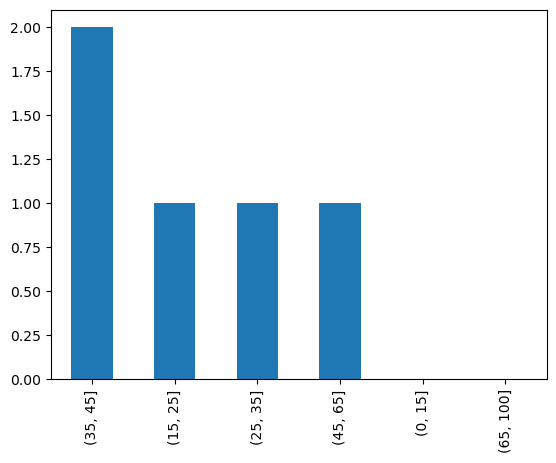

In [ ]:
data_rankings['age-group'].value_counts().plot.bar()

**Note:** ```data_rankings['age-group'].value_counts().plot(kind='bar')``` would also work.

**<u>Scatter plot</u>:**

Let's go back to our DataFrame using the ```cost_of_living.csv``` file. Let's say we wish to determine if there is any trend or correlation between ```purchasing_power_index``` and ```monthly_income```, in that case, we could want to look at a scatter plot like the following one:

<AxesSubplot:xlabel='monthly_income', ylabel='purchasing_power_index'>

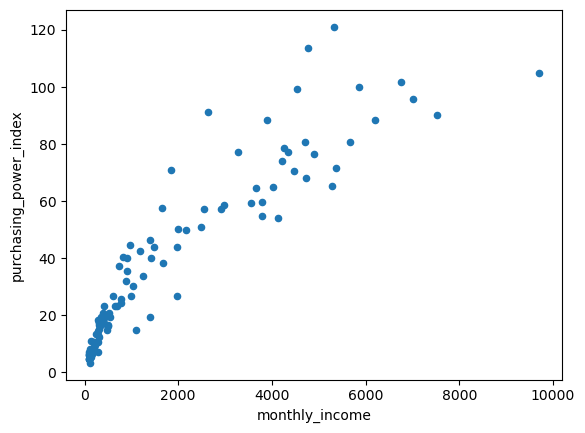

In [ ]:
df = pd.read_csv('cost_of_living.csv')
df.plot.scatter(x='monthly_income', y='purchasing_power_index')

**Note:** ```df.plot(x='monthly_income', y='purchasing_power_index', kind='scatter')``` would also make the trick.

**<u>Histogram</u>:**

Let's now make a histogram using the ```monthly_income``` column:

<AxesSubplot:ylabel='Frequency'>

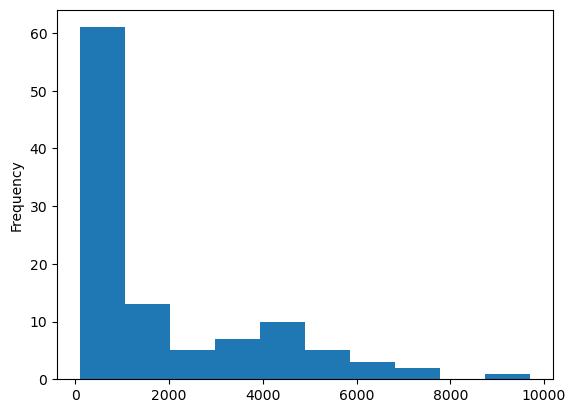

In [ ]:

df['monthly_income'].plot(kind='hist')

For other plotting options, see [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### <div id="other">2.B.m Other helpful attributes and functions</div>

**<u>```is_unique``` and ```set_index()```:</u>**

Sometimes, we expect a certain column to have unique values. We can confirm if that is correct in our DataFrame using the ```is_unique``` attribute.

Let's take a look at an example where a DataFrame has an ```'id'``` column with non-unique values and let's look at the result given by the ```is_unique``` attibute:

In [ ]:
df = pd.DataFrame(np.array([[0], [1], [2], [2], [4], [5]]), columns=['id'])
df['id'].is_unique

False

As expected, ```is_unique``` returned ```False``` since ```2``` is repeated.

Let's now look at an example where all values are unique:

In [ ]:
df = pd.DataFrame(np.array([[0], [1], [2], [3], [4], [5]]), columns=['id'])
df['id'].is_unique

True

Now as expected, ```is_unique``` returned ```True```. If we wish, since the ```'id'``` column has unique values, we could set it as index in our DataFrame with the ```set_index()``` function:

In [ ]:
df.set_index('id', inplace=True)
df.head()

""
id
0
1
2
3
4


**<u>Pivotting your DataFrame</u>:**

Let's create a tiny DataFrame with prices from four different stores for two products (a TV and a smartphone):

In [41]:
products = pd.DataFrame({
    'product': ['TV', 'TV', 'TV', 'TV', 'Smartphone', 'Smartphone', 'Smartphone', 'Smartphone'],
    'store': ['Fnac', 'Fust', 'Interdiscount', 'Amazon', 'Fust', 'Fnac', 'Amazon', 'Interdiscount'],
    'price':[499.99, 498.05, 460.20, 451.90, 259.99, 260.05, 250.20, 258.39],
})
products.head(8)

,product,store,price
0,TV,Fnac,499.99
1,TV,Fust,498.05
2,TV,Interdiscount,460.20
3,TV,Amazon,451.90
4,Smartphone,Fust,259.99
5,Smartphone,Fnac,260.05
6,Smartphone,Amazon,250.20
7,Smartphone,Interdiscount,258.39


Let's say we wish to more easily compare prices for the same products on different stores, if that's so, we could something like the following:

In [42]:
pivot_products = products.pivot(index='product', columns='store')
print(pivot_products)

            price                              
store      Amazon    Fnac    Fust Interdiscount
product                                        
Smartphone  250.2  260.05  259.99        258.39
TV          451.9  499.99  498.05        460.20
